### Current project is to study the data of THERA BANK
### Bank needs to be able to accurately identify customers who are Deposit Customers and who can be converted 
### to Loan Customers

In [1]:
# Numerical libraries
import numpy as np   
from sklearn.model_selection import train_test_split

# Import Linear Regression / KNN machine learning library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc

### 1. Data pre-processing - Understand the data and treat missing values, outliers (8 points)

In [2]:
# reading the excel file into pandas dataframe
bl_df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name=1) 

In [3]:
bl_df.quantile(.99)

ID                        4950.01
Age (in years)              65.00
Experience (in years)       41.00
Income (in K/month)        193.00
ZIP Code                 95929.00
Family members               4.00
CCAvg                        8.00
Education                    3.00
Mortgage                   431.01
Personal Loan                1.00
Securities Account           1.00
CD Account                   1.00
Online                       1.00
CreditCard                   1.00
Name: 0.99, dtype: float64

In [4]:
## In the data set the outliers for ID,ZIP Code and Family do not make any impact as they are more or less descriptive 
## in nature.
## Last four flag items PL, Sec Acc, CD Acc, Online, CC have no bearing on outliers.
## Age could be considered. No one has accepted an offer for PL at the age of 66/67
## Experience above 41 years is only in the age bracket of 66/67
## Salary beyond 193 K is also an exception and for age groups under 65
## for outliers we will only consider age bracket of 66/67 and exclude

In [5]:
bl_df_filt = bl_df[bl_df['Age (in years)'] < 65]

In [6]:
bl_df_filt.shape

(4884, 14)

In [7]:
# fill all null values with 0
bl_df_filt[bl_df_filt==np.inf]=np.nan
bl_df_filt.fillna(0, inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [8]:
### In my view the data is spread across alot of values for some of the variables
### Need is to categorise the variables in ranges, good enough for modelling and predicting
### Ranges are assumed with certain ratios, but in real life scenarios these should be business rules

In [9]:
# categorising age into range categories to evaluate similar age groups ( < 30 is young, 30 to 60 middle age, rest old)
bl_df_filt['Age (in years)_c'] = bl_df_filt['Age (in years)'].apply(lambda x: 0 if x <= 30 else (1 if (x > 30 and x <= 60) else 2))
# normalising the experience to 0 if it is a negative value as negative experience is not valid data
# further splitting it into experience ranges of low < 5, medium from 6 to 15 and then high > 15
bl_df_filt['Experience (in years)'] = bl_df_filt['Experience (in years)'].apply(lambda x: 0 if x < 0 else x)
bl_df_filt['Experience (in years)_c'] = bl_df_filt['Experience (in years)'].apply(lambda x: 0 if x <= 5 else ( 1 if (x > 5 and x <= 15) else 2))
# creating the mortgage variable to denote mortgage existing for the customer (0) or not (1)
bl_df_filt['Mortgage_c'] = bl_df_filt['Mortgage'].apply(lambda x: 1 if x > 0 else 0)
# creating income into low 0-50 K (0), medium 51-100 (1), high 101-150 (2) and very high categories 150+ (3)
bl_df_filt['Income (in K/month)_c'] = bl_df_filt['Income (in K/month)'].apply ( lambda x: 0 if x <= 50 else (1 if (x>50 and x<=100) else ( 2 if (x>100 and x<=150) else 3) ) )

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [10]:
bl_df_filt.head(10)

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age (in years)_c,Experience (in years)_c,Mortgage_c,Income (in K/month)_c
0,1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0,0,0,0,0
1,2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0,1,2,0,0
2,3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0,1,1,0,0
3,4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0,1,1,0,1
4,5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1,1,1,0,0
5,6,37,13,29,92121,4.0,0.4,2,155,0,0,0,1,0,1,1,1,0
6,7,53,27,72,91711,2.0,1.5,2,0,0,0,0,1,0,1,2,0,1
7,8,50,24,22,93943,1.0,0.3,3,0,0,0,0,0,1,1,2,0,0
8,9,35,10,81,90089,3.0,0.6,2,104,0,0,0,1,0,1,1,1,1
9,10,34,9,180,93023,1.0,8.9,3,0,1,0,0,0,0,1,1,0,3


In [11]:
### remove categorical values
bl_df_mod = bl_df_filt.drop(['Age (in years)','Experience (in years)','Income (in K/month)','Mortgage'], axis=1)

In [12]:
bl_df_mod.head(2)

,ID,ZIP Code,Family members,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age (in years)_c,Experience (in years)_c,Mortgage_c,Income (in K/month)_c
0,1,91107,4.0,1.6,1,0,1,0,0,0,0,0,0,0
1,2,90089,3.0,1.5,1,0,1,0,0,0,1,2,0,0


### 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (4 points)

In [13]:
bl_df_mod_chk = bl_df_mod.drop(['ID','Personal Loan'], axis=1)

In [14]:
bl_df_mod_chk.corr()

,ZIP Code,Family members,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Age (in years)_c,Experience (in years)_c,Mortgage_c,Income (in K/month)_c
ZIP Code,1.000000,0.007622,-0.002642,-0.019067,0.005907,0.022567,0.018863,0.005723,-0.009452,-0.027049,0.011600,-0.016689
Family members,0.007622,1.000000,-0.111160,0.061988,0.021130,0.014631,0.008035,0.010287,-0.067496,-0.087143,0.007075,-0.146190
CCAvg,-0.002642,-0.111160,1.000000,-0.135400,0.013196,0.131771,-0.006002,-0.005014,-0.017805,-0.013153,-0.015966,0.620987
Education,-0.019067,0.061988,-0.135400,1.000000,-0.010516,0.015440,-0.018498,-0.012558,0.034035,0.003285,-0.001104,-0.180308
Securities Account,0.005907,0.021130,0.013196,-0.010516,1.000000,0.315282,0.011183,-0.017233,0.006005,0.000659,-0.000831,-0.005209
CD Account,0.022567,0.014631,0.131771,0.015440,0.315282,1.000000,0.173480,0.277366,0.021361,0.013816,0.035773,0.159307
Online,0.018863,0.008035,-0.006002,-0.018498,0.011183,0.173480,1.000000,0.006361,0.012938,0.009873,-0.008926,0.002829
CreditCard,0.005723,0.010287,-0.005014,-0.012558,-0.017233,0.277366,0.006361,1.000000,-0.004600,0.003190,-0.002896,-0.004657
Age (in years)_c,-0.009452,-0.067496,-0.017805,0.034035,0.006005,0.021361,0.012938,-0.004600,1.000000,0.675531,0.004431,-0.034490
Experience (in years)_c,-0.027049,-0.087143,-0.013153,0.003285,0.000659,0.013816,0.009873,0.003190,0.675531,1.000000,-0.004763,-0.026342


In [15]:
## For testing purposes all remaining variables are showing some or the other impact on the model

### 3. Model the data using Logistic regression (4 points)

In [16]:
X = bl_df_mod.drop(['Personal Loan','ZIP Code'] , axis=1)
y = bl_df_mod.pop("Personal Loan")

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=7)

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
model.score(X_test,y_test)

0.9454297407912687

### 4. Find the accuracy of the model using confusion matrix (4 points)

In [19]:
predicted_dt = model.predict(X_test)

In [20]:
metrics.confusion_matrix(y_test, predicted_dt)

array([[1320,   15],
       [  65,   66]])

In [21]:
from sklearn.metrics import roc_curve, auc
y_predictProb = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.9515395831546445

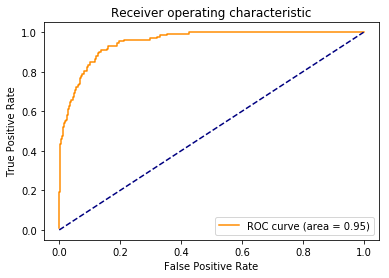

In [22]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [23]:
fpr

array([0.00000000e+00, 0.00000000e+00, 7.49063670e-04, 7.49063670e-04,
       1.49812734e-03, 1.49812734e-03, 2.24719101e-03, 2.24719101e-03,
       2.99625468e-03, 2.99625468e-03, 4.49438202e-03, 4.49438202e-03,
       5.99250936e-03, 5.99250936e-03, 8.23970037e-03, 8.23970037e-03,
       1.04868914e-02, 1.04868914e-02, 1.12359551e-02, 1.12359551e-02,
       1.19850187e-02, 1.19850187e-02, 1.27340824e-02, 1.27340824e-02,
       1.49812734e-02, 1.49812734e-02, 1.72284644e-02, 1.72284644e-02,
       2.24719101e-02, 2.24719101e-02, 2.39700375e-02, 2.39700375e-02,
       2.69662921e-02, 2.69662921e-02, 2.77153558e-02, 2.77153558e-02,
       2.92134831e-02, 2.92134831e-02, 3.07116105e-02, 3.07116105e-02,
       3.22097378e-02, 3.22097378e-02, 3.37078652e-02, 3.37078652e-02,
       3.67041199e-02, 3.67041199e-02, 3.74531835e-02, 3.74531835e-02,
       4.49438202e-02, 4.49438202e-02, 4.71910112e-02, 4.71910112e-02,
       4.94382022e-02, 4.94382022e-02, 5.24344569e-02, 5.24344569e-02,
      

In [24]:
thresholds[1]

0.8342689697233142

In [25]:
THRESHOLD = 0.8
preds = np.where(model.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds),
                   precision_score(y_test, preds)], 
             index=["accuracy", "recall", "precision"])

,0
accuracy,0.932469
recall,0.251908
precision,0.970588


### 5. Use K - NN model [Hint: Try different values of k] and compare the accuracy of this model with that of Logistic regression (10 points)

In [26]:
# Call Nearest Neighbour algorithm k=3
from sklearn.metrics import accuracy_score
model_NNH3 = KNeighborsClassifier(n_neighbors= 3)
model_NNH3.fit(X_train, y_train)
y_pred3 = model_NNH3.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred3)

0.9092769440654843

In [28]:
# Call Nearest Neighbour algorithm k=5
from sklearn.metrics import accuracy_score
model_NNH5 = KNeighborsClassifier(n_neighbors= 5)
model_NNH5.fit(X_train, y_train)
y_pred5 = model_NNH5.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred5)

0.9106412005457026

In [30]:
# Call Nearest Neighbour algorithm k=7
from sklearn.metrics import accuracy_score
model_NNH7 = KNeighborsClassifier(n_neighbors= 7)
model_NNH7.fit(X_train, y_train)
y_pred7 = model_NNH7.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred7)

0.9106412005457026

In [32]:
# Call Nearest Neighbour algorithm k=9
from sklearn.metrics import accuracy_score
model_NNH9 = KNeighborsClassifier(n_neighbors= 9)
model_NNH9.fit(X_train, y_train)
y_pred9 = model_NNH9.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred9)

0.9099590723055935

In [34]:
# 5/7 Nearest neighbours seems to be an optimum outcome

In [37]:
predicted_dt = model_NNH7.predict(X_test)

In [38]:
metrics.confusion_matrix(y_test, predicted_dt)

array([[1334,    1],
       [ 130,    1]])

In [39]:
from sklearn.metrics import roc_curve, auc
y_predictProb = model_NNH7.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.6026160048031565

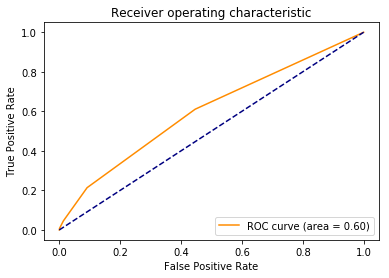

In [40]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [41]:
fpr

array([0.00000000e+00, 7.49063670e-04, 1.34831461e-02, 9.13857678e-02,
       4.46441948e-01, 1.00000000e+00])

In [42]:
thresholds[1]

0.5714285714285714

In [43]:
THRESHOLD = 0.5
preds = np.where(model.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds),
                   precision_score(y_test, preds)], 
             index=["accuracy", "recall", "precision"])

,0
accuracy,0.945430
recall,0.503817
precision,0.814815


In [ ]:
### Comparison of Logistic with KNN shows that there is increase in the RECALL value which is good from a model
### prediction perspective.